In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

# load and splits the dataset into training and testing

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

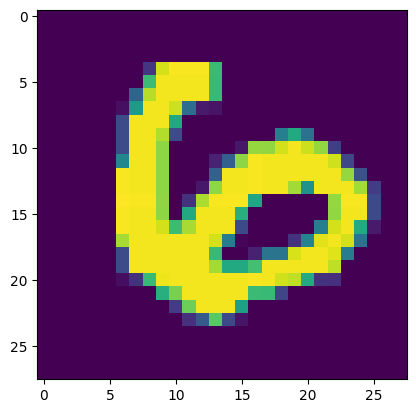

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[9000])

In [6]:
X_train = X_train/255
X_test = X_test/255

# normalises pixel values of images
'''
Why 255?
Each image is 28×28 pixels, and each pixel value ranges from 0 to 255 (grayscale intensity).

Dividing by 255 scales all pixel values to a range of 0.0 to 1.0.

'''

'\nWhy 255?\nEach image is 28×28 pixels, and each pixel value ranges from 0 to 255 (grayscale intensity).\n\nDividing by 255 scales all pixel values to a range of 0.0 to 1.0.\n\n'

In [7]:
X_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model = Sequential() # initialises a seqential model, so basically the layers are added one after the other
# so the models output from one layer is passed on as input to the next layer

model.add(Flatten(input_shape=(28,28))) # 2D input to 1D vector
model.add(Dense(256,activation='relu')) # rectified linear unit(turns -ve to zeros and keeps positive as is)
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax')) # converts raw output values into probabilities


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# loss function is used to calculate how well the model's predictions match the actual labels during training
# Sparse Categorical Cross-Entropy because of multi class classfication
# optimizer controls how the models weights are updated

In [11]:
history = model.fit(X_train,y_train,epochs=15,validation_split=0.2)
#bascially trains the model on data to classify images into correct labels and
#epochs is how many times the models will look at the training dataset
#20% of the training data will be used for validation during training
#history object keeps track of how well the model did during each epoch.

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8787 - loss: 0.4099 - val_accuracy: 0.9619 - val_loss: 0.1313
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9709 - loss: 0.0965 - val_accuracy: 0.9665 - val_loss: 0.1038
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9810 - loss: 0.0620 - val_accuracy: 0.9701 - val_loss: 0.1020
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9865 - loss: 0.0422 - val_accuracy: 0.9729 - val_loss: 0.0960
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9887 - loss: 0.0338 - val_accuracy: 0.9743 - val_loss: 0.0890
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9925 - loss: 0.0238 - val_accuracy: 0.9743 - val_loss: 0.1012
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9926 - loss: 0.0220 - val_accuracy: 0.9768 - val_loss: 0.0974
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9941 - loss: 0.01

In [12]:
y_prob = model.predict(X_test) # Predict probabilities for X_test
y_pred = y_prob.argmax(axis=1) # Get class labels from probabilities
#y_prob contains the predicted probabilities for each
#argmax() is a function that returns the index of the maximum value in an array

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9774

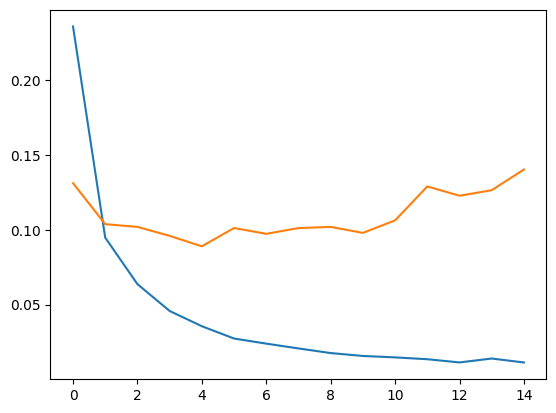

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#Training loss: How well the model is learning on the training data.



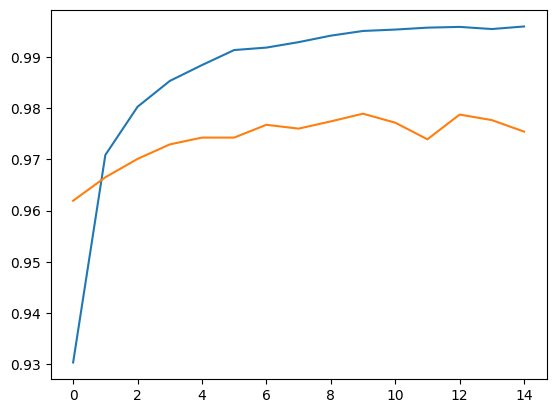

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

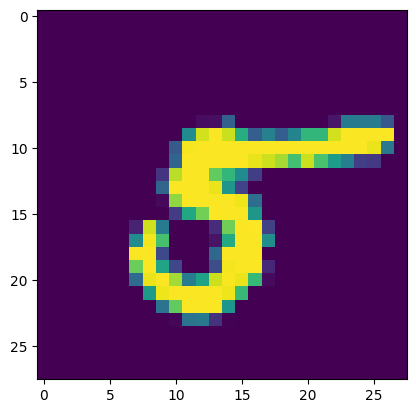

In [16]:
plt.imshow(X_test[9998])

In [17]:
model.predict(X_test[9999].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([6])